<a href="https://colab.research.google.com/github/Naiomeap/Saude-Mental/blob/main/Trabalho_Individual_Entrega_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Saúde Mental

#### **O objetivo desse trabalho busca descobrir se quanto mais ações de promoção a saúde e mais profissionais relacionados a saúde mental melhor será a saúde mental da população.**

Um tema que vem sendo muito discutido no Brasil e no mundo, é a saúde mental. Após a pandemia do Covid 19 esse problema se tornou cada vez mais recorrentes e muitos estudos andam abordando as consequências ocasionadas por problemas mentais na vida do indivíduo como sua vida profissional, social, amorosa etc (Machado et al, 2022: doi 10.47626/1679-4435-2022-680; Pinho et al, 2021: doi 10.2196/24298).

O contexto escolhido para a analise de dados foi um estado que fica na região sul do Brasil. O Paraná é um estado que possui 399 municipíos e é a 4º maior econômia do país. Com os dados disponibilizados pelo governo federal iremos analisar se há diferença entre esses municipios, se é possivel medir a saúde mental de uma determinada população e se ações de promoção a saúde, um conjunto de politicas, programas e plano de saúde pública que visa melhorar o bem estar e a qualidade de vida da população, podendo ser realizadas por individuos, coletivamente ou por organizações.

## Dicionário de Dados


**MUN** - Município - tipo de dado (object)

**AS_SOC** - Quantidade de Assistente Social - tipo de dado (float64)

**PSICO** - Quantidade de Psicólogo - tipo de dado (float64)

**PSIQ** - Quantidade de Psiquiatra - tipo de dado (float64)

**Acoes_prom** - Quantidade de Ações de Promoções e Prevenção da saúde - tipo de dado (int64)

**Acoes_comp** - Ações Complementares de Atenção a Saúde - tipo de dado (int64)

**2017** - Quantidade de Ações Complementares de Atenção a Saúde 2017 - tipo de dado (int64)

**2018** - Quantidade de Ações Complementares de Atenção a Saúde 2018 - tipo de dado (int64)

**2019** - Quantidade de Ações Complementares de Atenção a Saúde 2019 - tipo de dado (int64)

**2020** - Quantidade de Ações Complementares de Atenção a Saúde 2020 - tipo de dado (int64)

**2021** - Quantidade de Ações Complementares de Atenção a Saúde 2021 - tipo de dado (int64)

**AR_TER_km2** - Área Territorial em Km² - tipo de dado (float64)

**POP_EST** – Quantidade da população Estimada - tipo de dado (int64)

**PIB_P_CAP** - Produto Interno Bruto Per Capta (valores nominais) - tipo de dado (float64)

**IDHM** - Índice de Desenvolvimento Humano (escala) - tipo de dado (float64)

**CODUFMUN** - Código do Município - tipo de dado (int64)

**MUN** - Nome dos Município - tipo de dado (object)

**REC** - Recorrência de tentativa de suícidio 2017 - tipo de dado (float64)

**TENT_y** – Tentativa de Suícidio 2017 - tipo de dado (int64)

**REC_21** - Recorrência de tentativa de suícidio 2021 - tipo de dado (float64)

**TENT_21** – Tentativa de Suícidio 2021- tipo de dado (int64)

**Soma_Acoes** - Somatório das Ações Complementares da Saúde de 2017-2021 - tipo de dado (int64)

**Dif_Suc** - Subtração das colunas de tentativa de suícidio 2017-2021 - tipo de dado (float64)


## Bibliotecas

In [675]:
import pandas as pd
import numpy as np
import sklearn # scikit-learn
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() # Revert to matplotlib defaults
plt.rcParams['figure.figsize'] = (13, 10 )
plt.rcParams['axes.labelpad'] = 10
sns.set_style("darkgrid")
# sns.set_context("poster", font_scale=1.0)
np.random.seed(42)  # Define a semente para reprodução dos dados aleatórios
data = np.random.normal(size=1000)  # Cria um array com 1000 valores aleatórios com distribuição normal
q1 = np.percentile(data, 25)  # Primeiro quartil
q3 = np.percentile(data, 75)  # Terceiro quartil
iqr = q3 - q1  # Amplitude interquartil (IQR)
upper_limit = q3 + 1.5 * iqr  # Limite superior
lower_limit = q1 - 1.5 * iqr  # Limite inferior
x = [1, 2, 3, 4, 5]
y = [2, 4, 6, 8, 10]
import sklearn
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
from sklearn.model_selection import LeaveOneOut, cross_val_score
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold


Importando as bibliotecas que serão utilizada nesse projeto.

## Pré processamento da tabela referente a Copilado Dados da Saúde de 2021

No pré processamento foi realizado a limpeza dos arquivos, codificação do latim, separação por ; dos arquivos. 

Foi inserido 5 tabelas com dados relacionados a tentativa de suícidio, recorrência de tentativa e código dos munícipios (2017, 2018, 2019, 2020 e 2021). Também foi incluso 1 tabela com dados dos municípios, informações do IBGE (área territorial, estimativa populacional e pib per capita) e dados da saúde (psicológo, psiquiatra, assistente social, ações complementares e ações promocionais de 2017, 2018, 2019, 2020 e 2021).


In [676]:
s17=pd.read_csv('/content/Suicidio 2017.csv',  sep=';')
s18=pd.read_csv('/content/Suicidio 2018.csv',  sep=';')
s19=pd.read_csv('/content/Suicidio 2019 (1).csv',  sep=';')
s20=pd.read_csv('/content/Suicidio 2020 (1).csv',  sep=';')
s21=pd.read_csv('/content/Suicidio 2021 (1).csv',  sep=';')

In [677]:
df=pd.read_csv('/content/Tabela_dados.csv', sep=';', encoding='latin-1')


In [678]:
df[['CODUFMUN', 'MUN']] = df['Município'].str.split(n=1, expand= True) 

Mudança do nome de CODUFMUN e MUN para Município, para ser melhor visualizado

In [679]:
df['CODUFMUN']= df['CODUFMUN'].astype(int)

In [680]:
df = pd.merge(df, s17, on= 'CODUFMUN', how='left')
# df = pd.merge(df, s18, on= 'CODUFMUN', how='left', suffixes=(None, '_18'))
# df = pd.merge(df, s19, on= 'CODUFMUN', how='left', suffixes=(None, '_19'))
# df = pd.merge(df, s20, on= 'CODUFMUN', how='left', suffixes=(None, '_20'))
df = pd.merge(df, s21, on= 'CODUFMUN', how='left', suffixes=(None, '_21'))

Mescla das tabelas, sendo o ponto de referência o código do município e preservando as linhas mesmo não existindo dados nelas. Foi acrescentado _17 e _21 nas colunas de tentativa e recorrências dos respectivos anos.

Não foi realizado nas colunas de 2018, 2019 e 2020, pois foi uma escolha que elas seriam somadas. 

In [681]:
df= df.dropna()

Código para desconsiderar as linhas que continham NAN para poder rodar o modelo.

## Análise Exploratória e Descritiva

In [682]:
df


,Município,Assist_Soc,Psic,Psiqui,Acoes_prom,Acoes_comp,2017,2018,2019,2020,...,Ar_Ter_km2,Pop_Est,PIB,IDH,CODUFMUN,MUN,REC,TENT_y,REC_21,TENT_y_21
2,410300 Boa Esperança,0.0,2.0,0.0,10671,0,20,14,0,0,...,1517970,24370,3693139,7.00,410300,Boa Esperança,3.0,5.0,3.0,5.0
5,411930 Pinhão,3.0,7.0,0.0,1413,0,0,90,0,0,...,2270420,1168520,1168104,7.00,411930,Pinhão,4.0,16.0,8.0,32.0
6,411995 Pontal do Paraná,3.0,6.0,0.0,1325,0,201,162,0,0,...,1865810,48990,2496788,7.00,411995,Pontal do Paraná,6.0,8.0,6.0,8.0
8,412382 Santa Lúcia,1.0,1.0,0.0,432,0,24,17,0,0,...,4271930,115230,2861591,7.00,412382,Santa Lúcia,6.0,12.0,6.0,12.0
17,410180 Araucária,18.0,64.0,4.0,701796,11356,16877,17805,16901,16939,...,2395620,20260,4117991,6.70,410180,Araucária,3396.0,7680.0,2547.0,5760.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377,411520 Maringá,83.0,303.0,39.0,1062368,0,2075,293,0,0,...,2837930,55620,6261328,7.58,411520,Maringá,13884.0,29904.0,10413.0,22428.0
387,411150 Ivaiporã,9.0,25.0,0.0,3998,0,273,169,0,0,...,966610,32990,3452135,7.66,411150,Ivaiporã,39.0,117.0,13.0,39.0
389,411770 Palmeira,6.0,8.0,0.0,8556,0,0,0,0,0,...,6512380,323890,6964503,7.68,411770,Palmeira,144.0,303.0,288.0,606.0
391,410830 Foz do Iguaçu,36.0,124.0,14.0,5172,0,0,0,0,0,...,7351110,933080,3546016,7.74,410830,Foz do Iguaçu,138.0,336.0,138.0,336.0


In [ ]:
df.info()

O data frame é composto por 20 variavéis distribuidas em 68 entradas. Os dados não apresentam nenhum dado nulo, e todas as colunas de números estão como números, sendo a única coluna de string as coluna dos municípios.

In [684]:
df['Soma_Acoes'] = df['2018'] + df['2019'] + df['2020'] + df['2021'] 


Foi adicionada uma nova coluna Soma_Acoes, que é o somatório das colunas de 2018, 2019, 2020 e 2021 das ações complementares de promoção a saúde realizadas nesses anos.

In [685]:
df['Dif_Suc'] = df['TENT_y'] - df['TENT_y_21'] 

Foi adicionado uma coluna Dif_Suc que é a diminuição das tentativas de suícidio de 2017 com as tentativas em 2021.

In [686]:
df.describe()

,Assist_Soc,Psic,Psiqui,Acoes_prom,Acoes_comp,2017,2018,2019,2020,2021,...,Pop_Est,PIB,IDH,CODUFMUN,REC,TENT_y,REC_21,TENT_y_21,Soma_Acoes,Dif_Suc
count,68.000000,68.000000,68.000000,6.800000e+01,68.000000,68.000000,68.000000,68.00000,68.000000,68.000000,...,6.800000e+01,6.800000e+01,68.000000,68.00000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000
mean,16.147059,54.000000,5.941176,1.073563e+05,6237.705882,3765.191176,3939.691176,4513.75000,2658.088235,6237.705882,...,1.820157e+05,2.760476e+06,7.024706,411529.50000,1625.117647,3464.544118,1226.882353,2597.985294,17349.235294,866.558824
std,42.493288,190.954711,26.904409,2.096464e+05,24417.376823,12053.487367,14204.796579,18985.98088,10301.610233,24417.376823,...,2.506538e+05,1.150361e+06,0.358248,862.78692,5990.865311,11937.802031,4488.497879,8941.746146,58420.324151,3040.024594
min,0.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,2.026000e+04,3.110690e+05,6.090000,410100.00000,0.000000,3.000000,0.000000,3.000000,0.000000,-864.000000
25%,2.000000,3.750000,0.000000,5.276250e+03,0.000000,10.500000,0.000000,0.00000,0.000000,0.000000,...,4.935750e+04,2.154057e+06,6.810000,410746.25000,14.750000,36.250000,14.750000,36.000000,0.000000,-23.000000
50%,4.000000,8.000000,0.000000,3.552300e+04,0.000000,154.500000,89.000000,0.00000,0.000000,0.000000,...,8.950500e+04,2.662995e+06,7.045000,411555.00000,102.000000,220.000000,69.000000,243.000000,90.000000,0.000000
75%,8.250000,21.250000,2.250000,7.650550e+04,0.000000,960.500000,414.750000,0.00000,0.000000,0.000000,...,1.711425e+05,3.391363e+06,7.220000,412387.00000,907.500000,1913.000000,555.000000,1201.500000,827.750000,468.750000
max,291.000000,1500.000000,217.000000,1.062368e+06,173492.000000,84172.000000,97951.000000,140945.00000,73136.000000,173492.000000,...,1.168520e+06,6.964503e+06,7.740000,412855.00000,45636.000000,90540.000000,34227.000000,67905.000000,391454.000000,22635.000000


A média de psicologos nas cidades do estado do Paraná é de 5.55, porém o desvio padrão é de 3.83, sendo a quantidade maxima de profissionais em um município no estado é de 13. Em contra partida o número de psiquiatras é em média 1.23, com desvio padrão 2.88 e a quantidade máxima de profissionais é 217. 

In [687]:
df[cols].head()

,Assist_Soc,Psic,Psiqui,Acoes_prom,Acoes_comp,2017,2018,2019,2020,2021,Ar_Ter_km2,Pop_Est,PIB,IDH,REC,TENT_y,REC_21,TENT_y_21,Soma_Acoes,Dif_Suc
2,0.0,2.0,0.0,10671,0,20,14,0,0,0,1517970,24370,3693139,7.0,3.0,5.0,3.0,5.0,14,0.0
5,3.0,7.0,0.0,1413,0,0,90,0,0,0,2270420,1168520,1168104,7.0,4.0,16.0,8.0,32.0,90,-16.0
6,3.0,6.0,0.0,1325,0,201,162,0,0,0,1865810,48990,2496788,7.0,6.0,8.0,6.0,8.0,162,0.0
8,1.0,1.0,0.0,432,0,24,17,0,0,0,4271930,115230,2861591,7.0,6.0,12.0,6.0,12.0,17,0.0
17,18.0,64.0,4.0,701796,11356,16877,17805,16901,16939,11356,2395620,20260,4117991,6.7,3396.0,7680.0,2547.0,5760.0,63001,1920.0


In [688]:
df[cols].corr()

,Assist_Soc,Psic,Psiqui,Acoes_prom,Acoes_comp,2017,2018,2019,2020,2021,Ar_Ter_km2,Pop_Est,PIB,IDH,REC,TENT_y,REC_21,TENT_y_21,Soma_Acoes,Dif_Suc
Assist_Soc,1.000000,0.935854,0.907627,0.480042,-0.021453,0.165000,0.011491,0.001041,-0.007684,-0.021453,0.038110,0.092209,0.067098,-0.039509,0.931281,0.927897,0.937239,0.933655,-0.007189,0.897540
Psic,0.935854,1.000000,0.989495,0.422810,-0.011805,0.180641,0.019416,0.016006,0.008304,-0.011805,0.071041,0.021071,-0.027761,-0.096729,0.946505,0.944701,0.951625,0.949688,0.006453,0.916367
Psiqui,0.907627,0.989495,1.000000,0.413782,-0.027594,0.150090,-0.008020,-0.007767,-0.013419,-0.027594,0.089813,0.014133,-0.043119,-0.105224,0.960290,0.956130,0.963232,0.959222,-0.018374,0.933209
Acoes_prom,0.480042,0.422810,0.413782,1.000000,-0.040176,0.061709,-0.009042,-0.036794,-0.010748,-0.040176,-0.057231,-0.012830,0.239136,0.056087,0.518169,0.524622,0.519962,0.526208,-0.032843,0.512367
Acoes_comp,-0.021453,-0.011805,-0.027594,-0.040176,1.000000,0.441273,0.448155,0.455574,0.429202,1.000000,0.231570,0.043560,-0.066222,-0.156147,-0.034825,-0.023354,-0.035772,-0.022732,0.750669,-0.024847
2017,0.165000,0.180641,0.150090,0.061709,0.441273,1.000000,0.979269,0.971713,0.937833,0.441273,0.195148,0.010590,0.086894,-0.005083,0.142327,0.142113,0.135837,0.135561,0.903712,0.159330
2018,0.011491,0.019416,-0.008020,-0.009042,0.448155,0.979269,1.000000,0.989560,0.968717,0.448155,0.212116,0.055838,0.101350,0.033863,-0.005773,-0.006757,-0.014704,-0.015773,0.922875,0.019862
2019,0.001041,0.016006,-0.007767,-0.036794,0.455574,0.971713,0.989560,1.000000,0.976294,0.455574,0.182603,0.041686,0.086180,0.038472,-0.007058,-0.008768,-0.016246,-0.018135,0.928167,0.018911
2020,-0.007684,0.008304,-0.013419,-0.010748,0.429202,0.937833,0.968717,0.976294,1.000000,0.429202,0.186255,0.066152,0.083656,0.011932,-0.005531,-0.006624,-0.016559,-0.017827,0.908552,0.026425
2021,-0.021453,-0.011805,-0.027594,-0.040176,1.000000,0.441273,0.448155,0.455574,0.429202,1.000000,0.231570,0.043560,-0.066222,-0.156147,-0.034825,-0.023354,-0.035772,-0.022732,0.750669,-0.024847


### Gráfico de correlação de Pearson

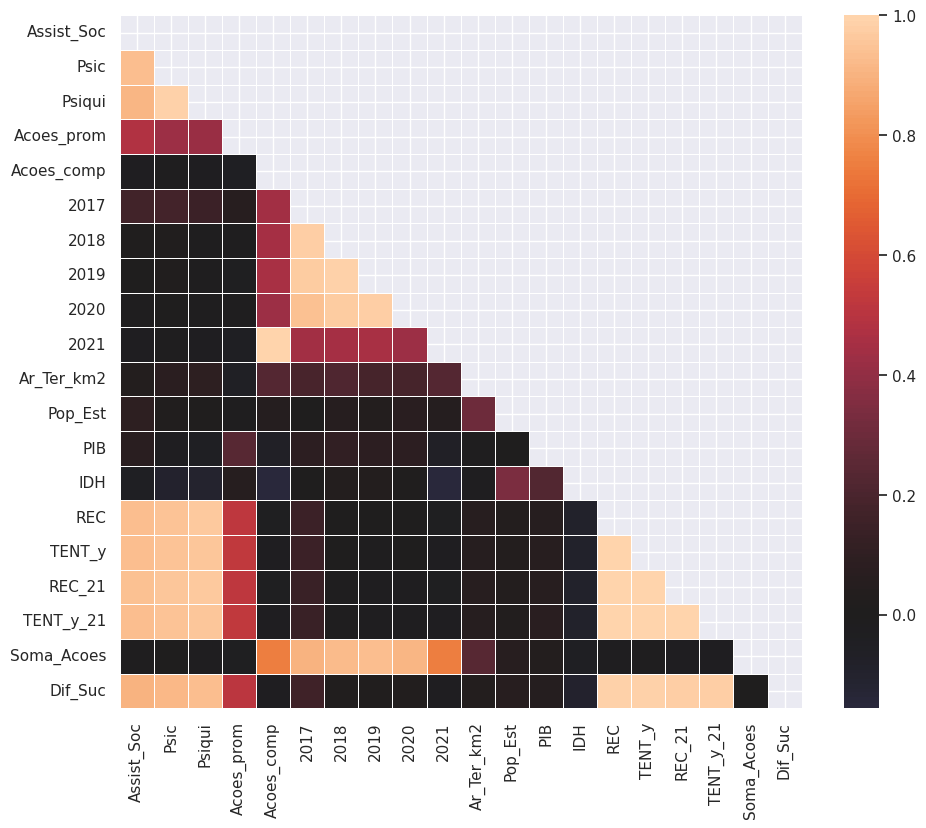

In [689]:
corr = df[cols].corr()
mask = np.triu(np.ones_like(corr, dtype= bool))
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr, mask= mask, center= 0, linewidth= 0.5);

Existe uma correlação entre as ações promocionais de saúde, com relação as tentativas de suícidio e recorrencia de tentativas. Esses dados serão analisados para verificar se essas ações são positivas ou negativas. 

### Gráfico de Contagem




In [690]:
df['Psic']

2        2.0
5        7.0
6        6.0
8        1.0
17      64.0
       ...  
377    303.0
387     25.0
389      8.0
391    124.0
392      5.0
Name: Psic, Length: 68, dtype: float64

In [691]:
df['Psic'] = pd.cut(df['Psic'], bins=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 100, 250, 500, 1000, 1500], labels=False)

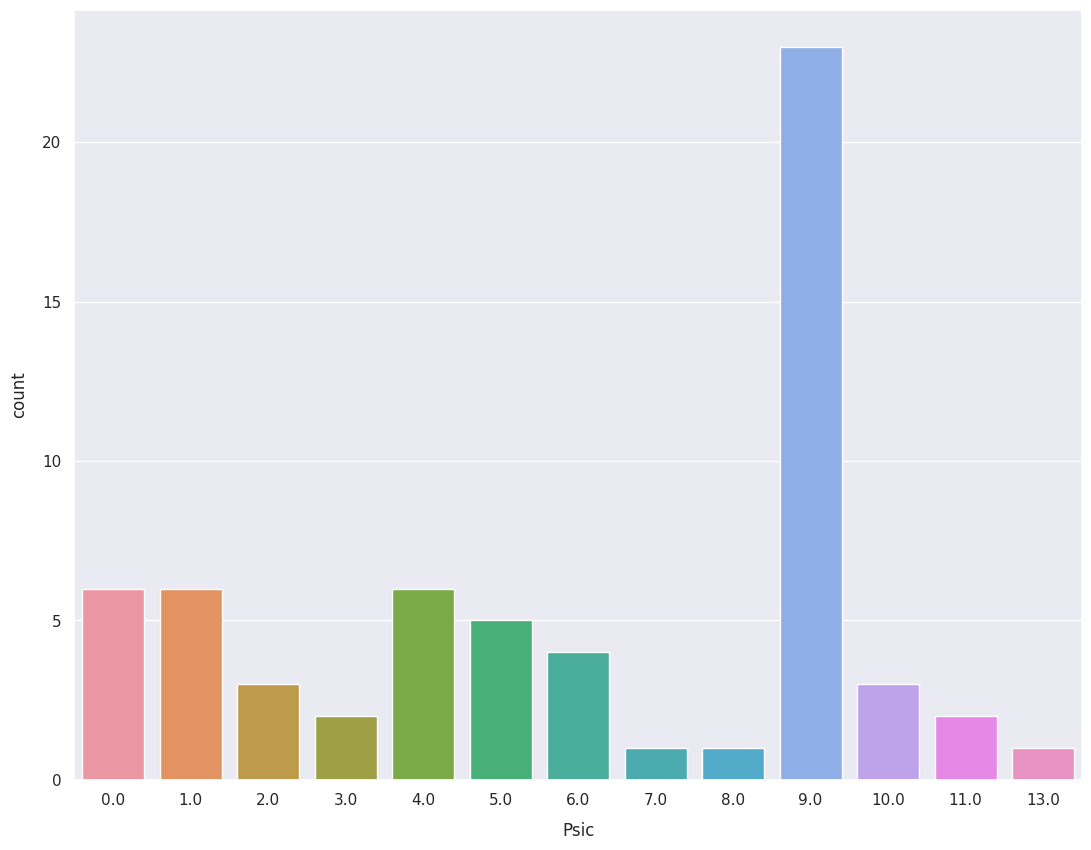

In [692]:
sns.countplot(data=df,x='Psic');

In [693]:
df['Assist_Soc']

2       0.0
5       3.0
6       3.0
8       1.0
17     18.0
       ... 
377    83.0
387     9.0
389     6.0
391    36.0
392     5.0
Name: Assist_Soc, Length: 68, dtype: float64

In [694]:
df['Assist_Soc'] = pd.cut(df['Assist_Soc'], bins=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 50, 100, 250, 300], labels=False)

<Axes: xlabel='Assist_Soc', ylabel='count'>

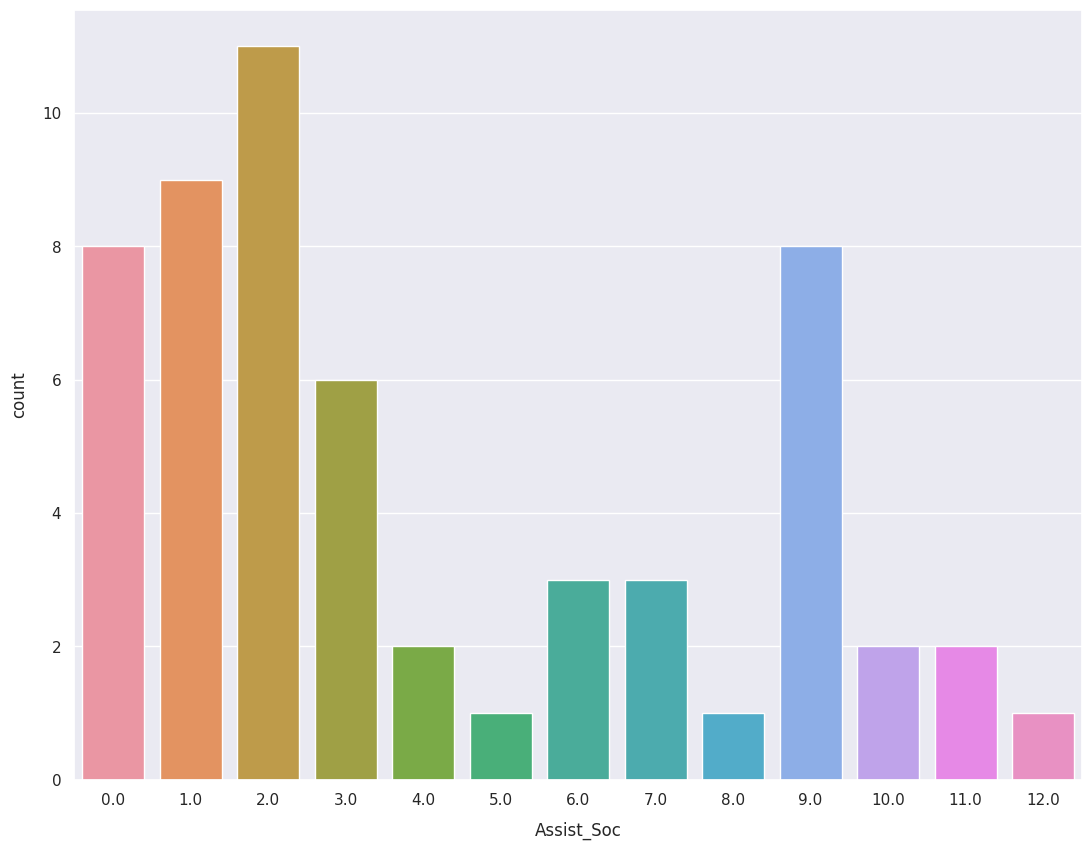

In [695]:
sns.countplot(data=df,x='Assist_Soc')

In [696]:
df['Psiqui']

2       0.0
5       0.0
6       0.0
8       0.0
17      4.0
       ... 
377    39.0
387     0.0
389     0.0
391    14.0
392     0.0
Name: Psiqui, Length: 68, dtype: float64

In [697]:
df['Psiqui'] = pd.cut(df['Psiqui'], bins=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 50, 100, 200, 250], labels=False)

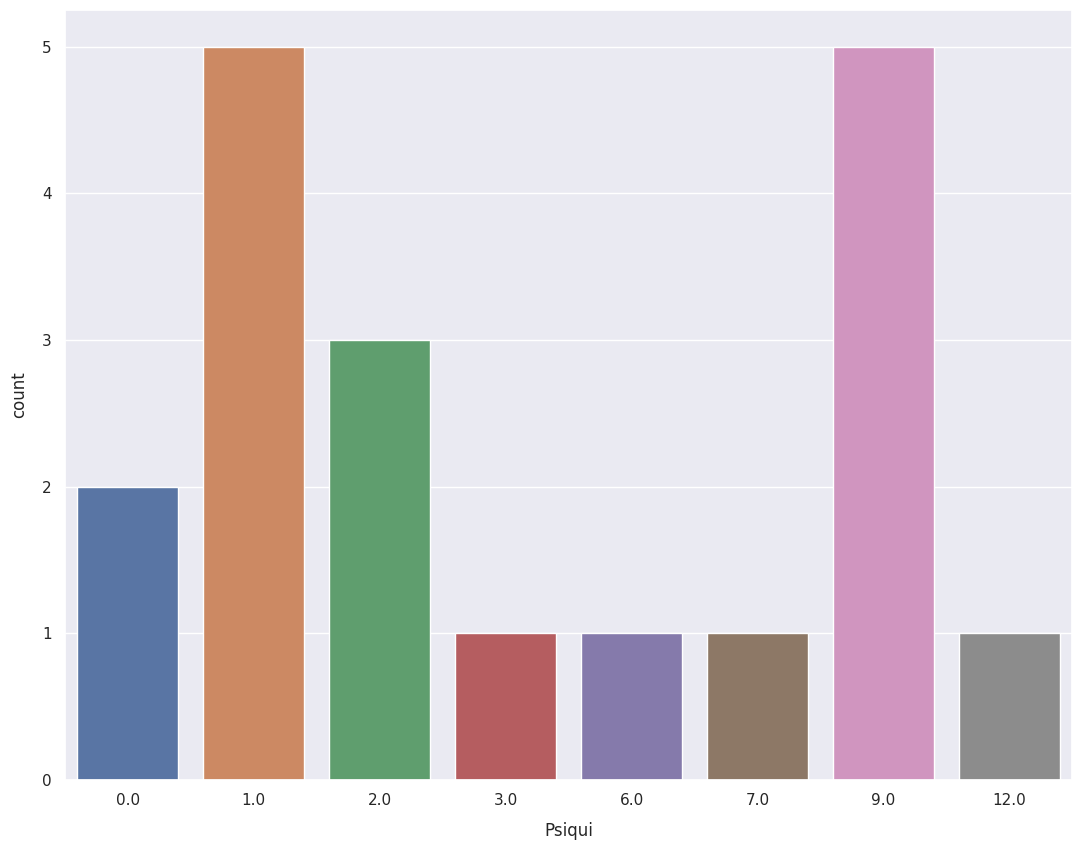

In [698]:
sns.countplot(data=df,x='Psiqui');

In [699]:
df['Acoes_prom']

2        10671
5         1413
6         1325
8          432
17      701796
        ...   
377    1062368
387       3998
389       8556
391       5172
392      43618
Name: Acoes_prom, Length: 68, dtype: int64

In [700]:
df['Acoes_prom'] = pd.cut(df['Acoes_prom'], bins=[1500, 3000, 5000, 10000, 50000, 100000, 200000, 5000000], labels=False)

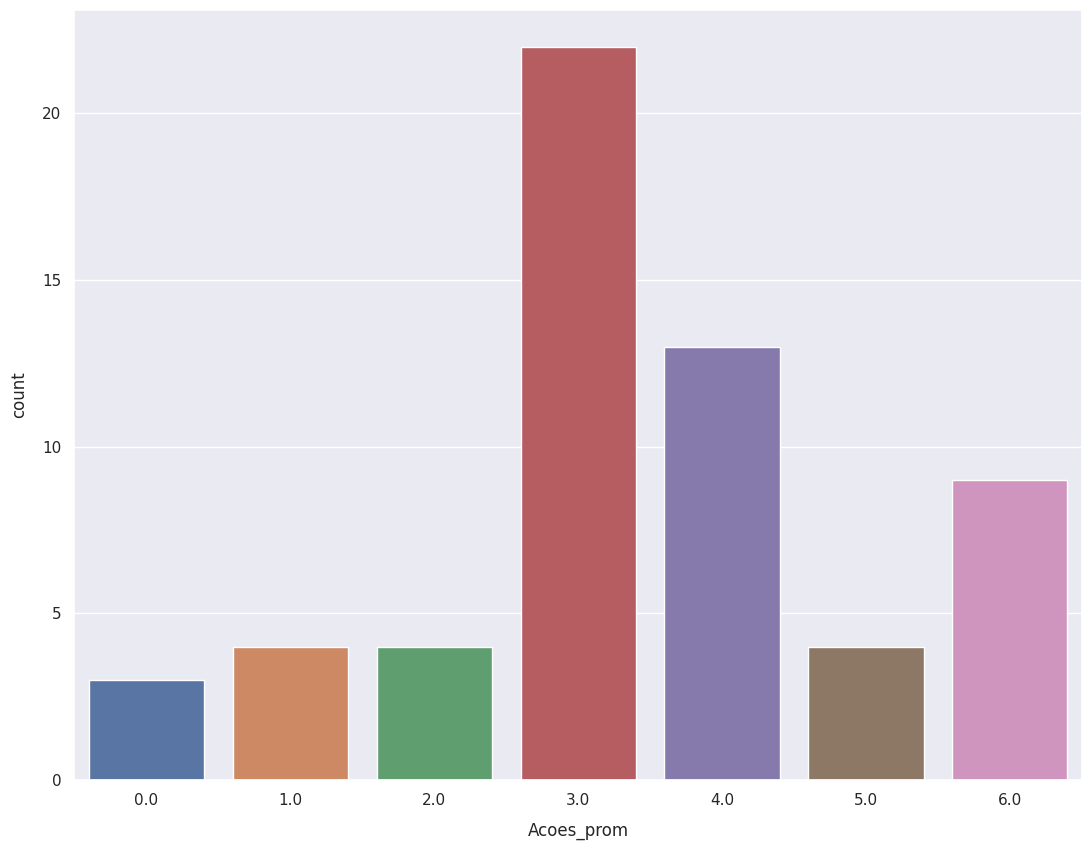

In [701]:
sns.countplot(data=df,x='Acoes_prom');

In [702]:
df['Acoes_comp']

2          0
5          0
6          0
8          0
17     11356
       ...  
377        0
387        0
389        0
391        0
392        0
Name: Acoes_comp, Length: 68, dtype: int64

In [703]:
df['Acoes_comp'] = pd.cut(df['Acoes_comp'], bins=[1500, 3000, 5000, 10000, 50000, 100000, 250000], labels=False)

<Axes: xlabel='Acoes_comp', ylabel='count'>

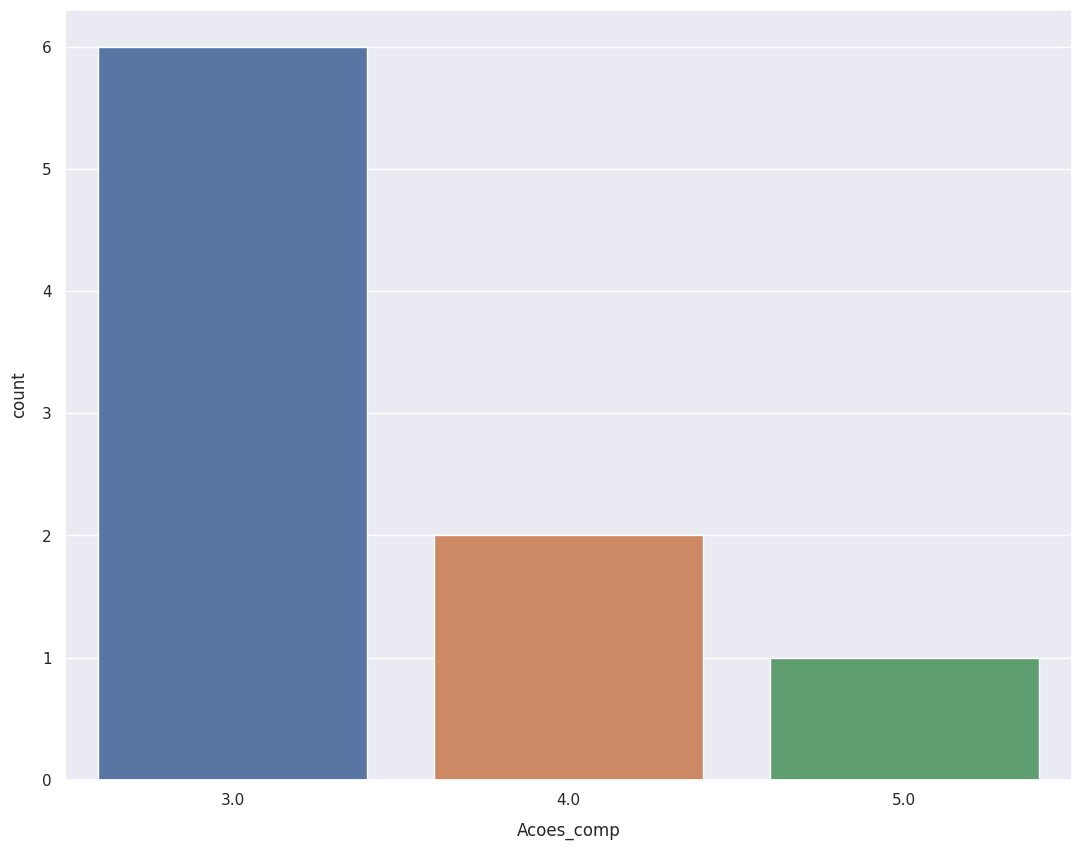

In [704]:
sns.countplot(data=df,x='Acoes_comp')

## Estratégia Analítica


A estratégica analítica desse projeto, busca descobrir se as tentativas de suícidio no estado do Paraná aumentaram ou diminuíram por causa das ações de promoção de saúde.

In [705]:
df=df.fillna(0)

In [706]:
df[cols]

,Assist_Soc,Psic,Psiqui,Acoes_prom,Acoes_comp,2017,2018,2019,2020,2021,Ar_Ter_km2,Pop_Est,PIB,IDH,REC,TENT_y,REC_21,TENT_y_21,Soma_Acoes,Dif_Suc
2,0.0,0.0,0.0,3.0,0.0,20,14,0,0,0,1517970,24370,3693139,7.00,3.0,5.0,3.0,5.0,14,0.0
5,1.0,5.0,0.0,0.0,0.0,0,90,0,0,0,2270420,1168520,1168104,7.00,4.0,16.0,8.0,32.0,90,-16.0
6,1.0,4.0,0.0,0.0,0.0,201,162,0,0,0,1865810,48990,2496788,7.00,6.0,8.0,6.0,8.0,162,0.0
8,0.0,0.0,0.0,0.0,0.0,24,17,0,0,0,4271930,115230,2861591,7.00,6.0,12.0,6.0,12.0,17,0.0
17,9.0,9.0,2.0,6.0,3.0,16877,17805,16901,16939,11356,2395620,20260,4117991,6.70,3396.0,7680.0,2547.0,5760.0,63001,1920.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377,10.0,11.0,9.0,6.0,0.0,2075,293,0,0,0,2837930,55620,6261328,7.58,13884.0,29904.0,10413.0,22428.0,293,7476.0
387,7.0,9.0,0.0,1.0,0.0,273,169,0,0,0,966610,32990,3452135,7.66,39.0,117.0,13.0,39.0,169,78.0
389,4.0,6.0,0.0,2.0,0.0,0,0,0,0,0,6512380,323890,6964503,7.68,144.0,303.0,288.0,606.0,0,-303.0
391,9.0,10.0,9.0,2.0,0.0,0,0,0,0,0,7351110,933080,3546016,7.74,138.0,336.0,138.0,336.0,0,0.0


Foi realizado a substituição de NAN por 0 nas linhas restantes para não dar nenhum erro.

In [707]:
x = df.drop(['2017', '2018', '2019', '2020', '2021', 'Município', 'CODUFMUN', 'MUN', 'REC', 'TENT_y', 'REC_21', 'TENT_y_21', 'Dif_Suc'], axis=1)
y = df['Dif_Suc']


Foi definido o meu Y (variável resposta). Que é a Dif_Suc é as tentativas de suícidio de 2021 subtraído do ano de 2017, para analisar se houve aumento ou não nas tentativas.

Minha variável X foi retirado as colunas de ações promocionais de 2017, 2018, 2019, 2020 e 2021, munícipios, código de município e as tentativas e recorrência de 2017 e 2021.

In [708]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


Ocorreu a separação dos dados em treino e teste, sendo tamanho de teste de 20% dos dados totais e fixando a semente aleatória para 42. Também foi realizado o escalonamento da tabela, para todas as variáveis terem valores de média 0 e desvio padrão 1.

In [709]:
kf = KFold(n_splits=7, shuffle=True, random_state=11)

Realização da reamostragem por Cross Validation em 7 folds

### Regressão Lasso

Foi realizado a escolha de Regressão Lasso, pois ela faz a regularização e a seleção automática de variáveis, tendendo a reduzir os coeficientes de variáveis irrelevantes para zero.


In [712]:
# define o modelo de regressão de Lasso
alpha = 0.1  # valor do parâmetro de regularização
lasso = Lasso(alpha=alpha)

# treina o modelo
lasso.fit(x_train_scaled, y_train)

# faz as predições no conjunto de teste
y_pred = lasso.predict(x_test_scaled)

# calcula o erro médio quadrático (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse:.2f}")

# obtém os coeficientes do modelo
coef = pd.Series(lasso.coef_, index=x.columns)

# exibe os coeficientes selecionados pelo modelo
selected_coef = coef[coef != 0]
print(f"Coeficientes selecionados:\n{selected_coef}")


MSE: 2483290.16
Coeficientes selecionados:
Assist_Soc    -512.044563
Psic           712.469774
Psiqui        2554.981427
Acoes_prom    -119.578449
Acoes_comp    -934.811553
Ar_Ter_km2     170.427637
Pop_Est       -278.990203
PIB           -438.793676
IDH           -647.343601
Soma_Acoes     531.799989
dtype: float64


o coeficiente das variáveis Assistente Social, Ações de Promoção de saúde, Ações Complementares, Estimativa Populacional, PIB per capita e IDH significam que quanto maior os valores apresentados, menor é a taxa de tentativa de suícidio. 

Em contra partida, quanto mais psicólogos, psiquiatras e área territorial, sugere o aumento das tentativas de suícidio.

### Caminho da Solução de Lasso

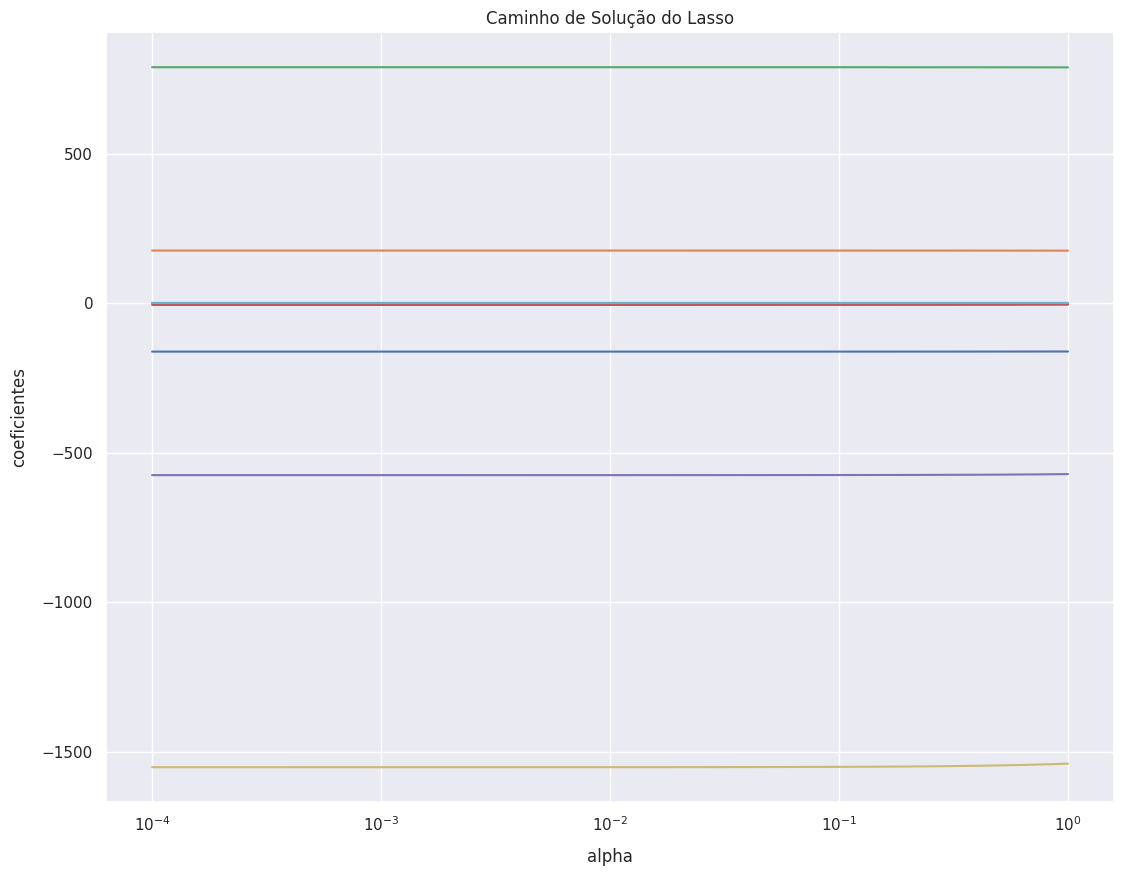

In [713]:
alphas = np.logspace(-4, 0, 100)
coefs = []
for a in alphas:
    lasso = Lasso(alpha=a, max_iter=10000)
    lasso.fit(x, y)
    coefs.append(lasso.coef_)
plt.plot(alphas, coefs)
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('coeficientes')
plt.title('Caminho de Solução do Lasso')
plt.show()

Mostra a evolução dos coeficientes à medida que o parâmetro de regularização é ajustado, permitindo avaliar a estabilidade das estimativas.

## Resultados


Esse projeto tinha como objetivo falar sobre a saúde mental no estado do Paraná. E foi utilizado como a variável resposta a quantidade de tentativas de suícidio e o que influenciava nesses dados.

Durante a Regressão Lasso, nos sugere que as cidades que quanto maior PIB per capita, IDH, estimativa populacional, assistente social, ações complementares a saúde e ações de promoção da saúde se reduz as tentativas de suícidio. 

Em contrapartida, quanto maior a quantidade de psicólogos, psiquiatras e área territorial aumenta as tentativas de suícidio. Esses dados são explicados, pois a epidemiologia nacional rastreiam os dados para poder solucionar problemas por localidade, logo as cidades que possuem uma maior tentativa de suícidio serão enviados mais profissionais que irão cuidar da população da cidade.

As limitações dessa pesquisas foram os dados exatos, pois as tentativas de suícidios apenas são notificados quando existem entrada em hospital (ou algum estabelecimento de saúde), podendo ser subnotificados, além de não ser minha área de trabalho e nunca ter trabalhado com isso e ter que conversar com diversos profissionais da área da saúde para tentar entender o problema em questão.

As sugestões de pesquisas futuras é o acompanhamento desses dados para verificar se a diminuição das tentativas de suícidio ocorreram por causa da pandemia, visto que em épocas de guerras, pandemia, etc. tende se abaixar tentativas de suícidio (estudos mostram que esse número tendem a baixar nesses momentos, porém em seguida aumentam). 